### 2-1) メタノール合成反応器に合成ガスを導入して反応させる。以下の反応3と反応2が起こり、反応器出口で平衡が達成されるとして出口の各成分の分率を求めよ。ただし、反応器条件は出口で温度 250°C、7.5 MPa とする。

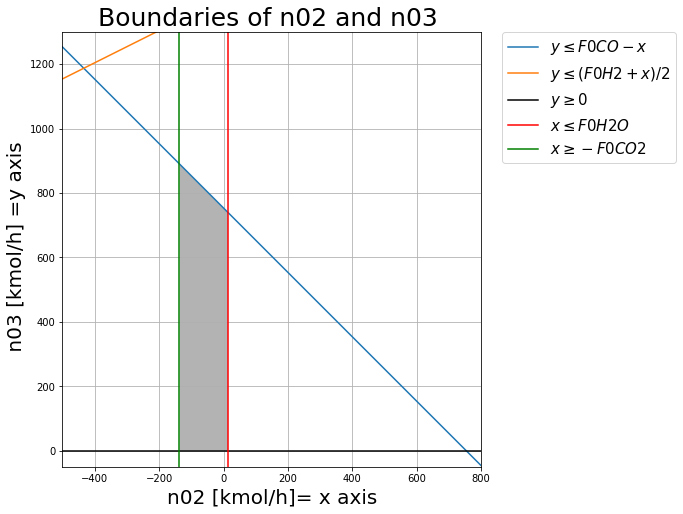

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

F0CH4=109.6
F0H2O=13.4
F0CO=753.4
F0H2=2808.3
F0CO2=137.0
F0CH3OH=0

plt.figure(figsize=(8,8))
plt.grid()
# plot the feasible region
d = np.linspace(-150,900,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((y<=F0CO-x)&(y<=(F0H2+x)/2) & (y>=0) & (x<=F0H2O) & (x>=-F0CO2)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

# plot the lines defining the constraints
x = np.linspace(-2850, 800, 2000)

y1=F0CO-x
plt.plot(x, y1, label=r'$y\leq F0CO-x$')

y2=(F0H2+x)/2
plt.plot(x, y2, label=r'$y\leq (F0H2+x)/2$')

y3=0*x
plt.plot(x, y3,color='k', label=r'$y\geq 0$')

plt.axvline(x=F0H2O,color='r',label=r'$x\leq F0H2O$')

plt.axvline(x=-F0CO2,color='g',label=r'$x\geq -F0CO2$')

# Make plot
plt.title('Boundaries of n02 and n03 ', fontsize=25)
plt.xlim(-500,800)
plt.ylim(-50,1300)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=15)
plt.xlabel('n02 [kmol/h]= x axis',fontsize=20)
plt.ylabel(' n03 [kmol/h] =y axis',fontsize=20)

plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

def FunctionEquilibrium(T,P):
    
    Te=T+273.15
    Pe=P/101325
    
    Kp3=math.exp(21.225+9143.6/Te-7.492*math.log(Te)+4.076*10**-3*Te-7.161*10**-8*Te**2)
    Kp2=math.exp(13.148-5639.5/Te-1.077*math.log(Te)-5.44*10**-4*Te+1.125*10**-7*Te**2+49170/Te**2)
    
    F0CH4=109.6*10**3
    F0H2O=13.4*10**3
    F0CO=753.4*10**3
    F0H2=2808.3*10**3
    F0CO2=137.0*10**3
    F0CH3OH=0
    
    n2min=-F0CO2
    n2max=F0H2O

    while n2max-n2min>10**-6:  
        n2=(n2min+n2max)/2.0
        
        n3min=0
        n3max=F0CO-n2
        
        while n3max-n3min>10**(-6):  
            n3=(n3max+n3min)/2
            
            FCO=F0CO-n3-n2
            FH2O=F0H2O-n2
            FCO2=F0CO2+n2
            FH2=F0H2-2*n3+n2
            FCH3OH=F0CH3OH+n3
            FCH4=F0CH4
            Ftotal=FCH4+FH2O+FCO+FH2+FCO2+FCH3OH

            yCH4=FCH4/Ftotal
            yH2O=FH2O/Ftotal
            yCO=FCO/Ftotal
            yH2=FH2/Ftotal
            yCO2=FCO2/Ftotal
            yCH3OH=FCH3OH/Ftotal
            
            Kϕ2=1.0
            Kp2Calc=yCO2*yH2/(yCO*yH2O)*Kϕ2
            Kϕ3=1.0
            Kp3Calc=yCH3OH/(yCO*yH2**2)/Pe**2*Kϕ3

            if Kp3Calc>Kp3:
                n3max=n3
            else:
                n3min=n3
                
        if Kp2Calc>Kp2:
            n2max=n2
        else:
            n2min=n2
        
    print("Kp3=",Kp3)
    print("Kp3Calc=",Kp3Calc)
    print("Kp2=",Kp2)
    print("Kp2Calc=",Kp2Calc)
    print("n3=",n3,"mol/h")
    print("n2=",n2,"mol/h")
    print("yCH4=",yCH4)
    print("yH2O=",yH2O)
    print("yCO=",yCO)
    print("yH2=",yH2)
    print("yCO2=",yCO2)
    print("yCH3OH=",yCH3OH)

FunctionEquilibrium(250,7.5*10**6)
    

Kp3= 0.0022808615438347207
Kp3Calc= 0.0022808615438381676
Kp2= 0.011702947213532435
Kp2Calc= 0.011702947219362441
n3= 691772.1094997011 mol/h
n2= -136729.42694177618 mol/h
yCH4= 0.04495200874942499
yH2O= 0.06157499373570149
yCO= 0.08135547325883788
yH2= 0.5282789410323186
yCO2= 0.00011097447518828214
yCH3OH= 0.2837276087485287


### 2-2) r をリサイクルフローの比率(リサイクルされるガス流量の原料ガス流量に対する比率)、p をパージの比率(パージされるガス流量のリサイクルされるガス流量に対する比率)とする。
### 2-1)と同様に合成ガスを供給した場合の、r の変化に対する p、合成されるメタノールの流量、の変化を図示せよ。ただし、フラッシュ分離では液化した CH 3 OH、H 2 O に他の成分は溶解しないと仮定する。
### 実際のプラントでは r は 7.8 程度に設定さている。その理由について考察せよ

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

Ts=35+273.15
ACH3OH = 23.48027002
BCH3OH = 3626.55
CCH3OH = -34.29
PCH3OHvap=math.exp(ACH3OH-BCH3OH/(CCH3OH+Ts))
AH2O = 23.19637
BH2O = 3816.44
CH2O = -46.13
PH2Ovap=math.exp(AH2O-BH2O/(CH2O+Ts))
Ptotal=7.5*10**6
print("PCH3OHvap=",PCH3OHvap,"Pa")
print("PH2Ovap=",PH2Ovap,"Pa")

def FunctionEquilibrium(T,P,p):
    
    Te=T+273.15
    Pe=P/101325
    
    Kp3=math.exp(21.225+9143.6/Te-7.492*math.log(Te)+4.076*10**-3*Te-7.161*10**-8*Te**2)
    Kp2=math.exp(13.148-5639.5/Te-1.077*math.log(Te)-5.44*10**-4*Te+1.125*10**-7*Te**2+49170/Te**2)
    
    F2CH4=109.6*10**3
    F2H2O=13.4*10**3
    F2CO=753.4*10**3
    F2H2=2808.3*10**3
    F2CO2=137.0*10**3
    F2CH3OH=0

    Fi7CH4=0
    Fi7H2O=0
    Fi7CO=0
    Fi7H2=0
    Fi7CO2=0
    Fi7CH3OH=0
    
    while True:
        Fi7total=Fi7CH4+Fi7CO+Fi7CO2+Fi7H2+Fi7H2O+Fi7CH3OH
        
        F3CH4=Fi7CH4+F2CH4
        F3H2O=Fi7H2O+F2H2O
        F3CO=Fi7CO+F2CO
        F3H2=Fi7H2+F2H2
        F3CO2=Fi7CO2+F2CO2
        F3CH3OH=Fi7CH3OH+F2CH3OH
        
        n2min=-F3CO2
        n2max=F3H2O
        
        while n2max-n2min>10**(-6):
            n2=(n2min+n2max)/2           

            n3min=0
            n3max=F3CO-n2 
            
            while n3max-n3min>10**(-6):
                n3=(n3max+n3min)/2
                
                F4CO=F3CO-n3-n2
                F4H2O=F3H2O-n2  
                F4H2=F3H2-2*n3+n2
                F4CH3OH=F3CH3OH+n3
                F4CO2=F3CO2+n2
                F4CH4=F3CH4
                F4total=F4CH4+F4H2O+F4CO+F4H2+F4CO2+F4CH3OH

                y4CH4=F4CH4/F4total
                y4H2O=F4H2O/F4total
                y4CO=F4CO/F4total
                y4H2=F4H2/F4total
                y4CO2=F4CO2/F4total
                y4CH3OH=F4CH3OH/F4total

                Kϕ3=1.0
                Kp3Calc=y4CH3OH/(y4CO*y4H2**2)/Pe**2*Kϕ3
                
                Kϕ2=1.0
                Kp2Calc=y4CO2*y4H2/(y4CO*y4H2O)*Kϕ2

                if Kp3Calc>Kp3:
                    n3max=n3
                else:
                    n3min=n3

            if Kp2Calc>Kp2:
                n2max=n2
            else:
                n2min=n2
                    
        F5CH4=F4CH4
        F5CO=F4CO
        F5CO2=F4CO2
        F5H2=F4H2
        F5H2O=(F5CH4+F5CO+F5CO2+F5H2)*PH2Ovap/(Ptotal-PH2Ovap-PCH3OHvap)
        F5CH3OH=(F5CH4+F5CO+F5CO2+F5H2)*PCH3OHvap/(Ptotal-PH2Ovap-PCH3OHvap)

        F6CH4=0
        F6CO=0
        F6CO2=0
        F6H2=0
        F6H2O=F4H2O-F5H2O
        F6CH3OH=F4CH3OH-F5CH3OH

        F7CH4=F5CH4/(1+p)
        F7CO=F5CO/(1+p)
        F7CO2=F5CO2/(1+p)
        F7H2=F5H2/(1+p)
        F7H2O=F5H2O/(1+p)
        F7CH3OH=F5CH3OH/(1+p)
        F7total=F7CH4+F7CO+F7CO2+F7H2+F7H2O+F7CH3OH

        F8CH4=F5CH4*p/(1+p)
        F8CO=F5CO*p/(1+p)
        F8CO2=F5CO2*p/(1+p)
        F8H2=F5H2*p/(1+p)
        F8H2O=F5H2O*p/(1+p)
        F8CH3OH=F5CH3OH*p/(1+p)

        if abs(F7total-Fi7total)>10**-6:
            Fi7CH4=F7CH4
            Fi7H2O=F7H2O
            Fi7CO=F7CO
            Fi7H2=F7H2
            Fi7CO2=F7CO2
            Fi7CH3OH=F7CH3OH

        else:
            r=(F7CH4+F7CO+F7CO2+F7H2+F7H2O+F7CH3OH)/(F2CH4+F2CO+F2CO2+F2H2+F2H2O+F2CH3OH)
            
            print("Kp3=",Kp3)
            print("Kp3Calc=",Kp3Calc)
            print("Kp2=",Kp2)
            print("Kp2Calc=",Kp2Calc)
            print("n3=",n3,"mol/h")
            print("n2=",n2,"mol/h")
            print("p=",p)
            print("F6CH3OH=",F6CH3OH,"mol/h")
            print("r=",r)
            print("F7total=",F7total,"mol/h")
            print("Fi7total=",Fi7total,"mol/h")
            return p,F6CH3OH,r

            break

FunctionEquilibrium(250,7.5*10**6,0.01)
    

PCH3OHvap= 27942.941714247885 Pa
PH2Ovap= 5602.213021928711 Pa
Kp3= 0.0022808615438347207
Kp3Calc= 0.002280861543852358
Kp2= 0.011702947213532435
Kp2Calc= 0.011702947563299782
n3= 889095.9790590436 mol/h
n2= -136999.9618111735 mol/h
p= 0.01
F6CH3OH= 885338.4994786554 mol/h
r= 26.389379297544643
F7total= 100852290.86142637 mol/h
Fi7total= 100852290.86142565 mol/h


(0.01, 885338.4994786554, 26.389379297544643)

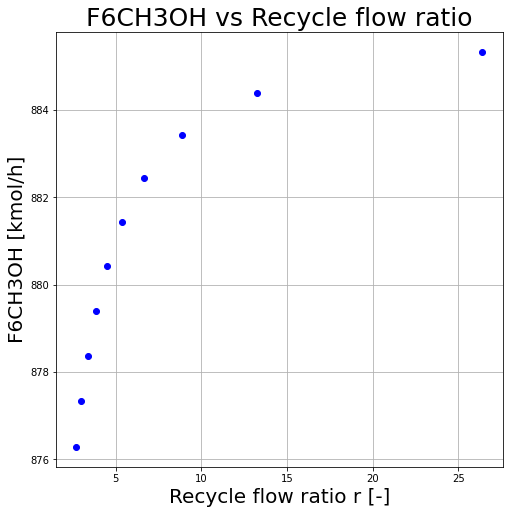

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

i=0
r=[]
F6CH3OH=[]
while i<10:
    i=i+1
    p=i/100
    
    r.append(FunctionEquilibrium(250,7.5*10**6,p)[2])
    F6CH3OH.append(FunctionEquilibrium(250,7.5*10**6,p)[1]/1000)

plt.figure(figsize=(8,8))
plt.plot(r,F6CH3OH,'bo')

plt.grid()
plt.title('F6CH3OH vs Recycle flow ratio', fontsize=25)
plt.xlabel('Recycle flow ratio r [-]', fontsize=20)
plt.ylabel('F6CH3OH [kmol/h]', fontsize=20)
plt.show()


In [5]:
print(r,F6CH3OH)

[26.389379297544643, 13.231768659740323, 8.84634091567026, 6.653931331912294, 5.338707693681857, 4.462059889691421, 3.8360127059792983, 3.366579021158787, 3.0015442021947165, 2.7095798605750185] [885.3384994786554, 884.3874900767619, 883.4194692653875, 882.4358508238106, 881.4380015690938, 880.4272400471577, 879.4048355833941, 878.3720076625756, 877.3299256127627, 876.2797085639241]


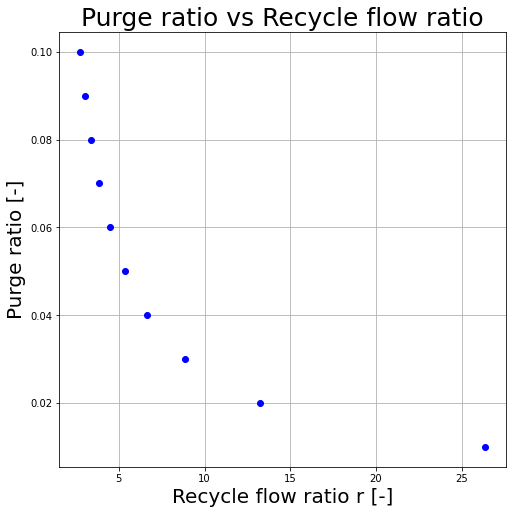

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

i=0
r=[]
purge=[]
while i<10:
    i=i+1
    p=i/100
    
    r.append(FunctionEquilibrium(250,7.5*10**6,p)[2])
    purge.append(FunctionEquilibrium(250,7.5*10**6,p)[0])

plt.figure(figsize=(8,8))
plt.plot(r,purge,'bo')

plt.grid()
plt.title('Purge ratio vs Recycle flow ratio', fontsize=25)
plt.xlabel('Recycle flow ratio r [-]', fontsize=20)
plt.ylabel('Purge ratio [-]', fontsize=20)
plt.show()




In [7]:
print(r,purge)

[26.389379297544643, 13.231768659740323, 8.84634091567026, 6.653931331912294, 5.338707693681857, 4.462059889691421, 3.8360127059792983, 3.366579021158787, 3.0015442021947165, 2.7095798605750185] [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
